# Executive Summary
#This analysis looks at global terrorist attacks from 1970 until 2015 using the Global Terrorism Database. It features detailed analysis, visual exploration, as well as modeling using random forest classification. 

#This important to look at because if we can accurately predict if a terrorist attack will be a success (have casualities) or fail, we can deploy protection methods against certain weapon types, protect certain groups prone to attack, and beef up security in high risk areas. We can also save resources by only sending emergency and/or police forces when there is high likelihood of casualities. 

To visually explore the data for analysis, I used Plotly which can easily crosstab data to show casualities by region, country, weapon type, etc. Because of the number of features the dataset had and the number of records, I chose to use Random Forrest Classification (the larger the dataset, the better random forrest is). 
 

## Technical Analysis
### Assumptions, Strengths and Weaknesses 
#### Assumptions
##### The Global Terrorism Database (GTD) records terror attacks around the world from 1970 through 2015, it includes systematic data on domestic and international terrorist incidents durint this time period.
#Contains information on over 150,000 terrorist attacks
#Includes information on more than 75,000 bombings, 17,000 assassinations, and 9,000 kidnappings since 1970
#Over 4,000,000 news articles and 25,000 news sources were reviewed to collect incident data from 1998 to 2015 alone

##### The data analyzed will be restricted to attacks that satisfy the three criteria per the Codebook guidelines.
#CRITERIA 1 : POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL
#CRITERIA 2 : INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)
#CRITERIA 3 : OUTSIDE INTERNATIONAL HUMANITARIAN LAW
##### This leads to have a subset of 129,922 terror attacks with 30 different features. 
##### Because of this, we are looking at a subset and potentially biased sample. 

#### Strengths
#Random Forest was used because the runtimes are quite fast for large datasets, and they are able to deal with unbalanced and missing data. 

#### Weaknesses 
#Since this dataset is based on 400k news articles, it is biased towards "successful" terrorist attacks. We don't hear about unsuccesful terrorist attacks (or they rarely make the news) 

#The weakness in using Random Forest with this dataset is it may over-fit datasets that are particularly noisy, which this dataset is particulary prone to. 

### This notebook aims to explore the global terrorism database in two ways:
#### Visually explore data, using Plotly, trying to answer the following questions: 

#### World Map of Terrorist Attacks 
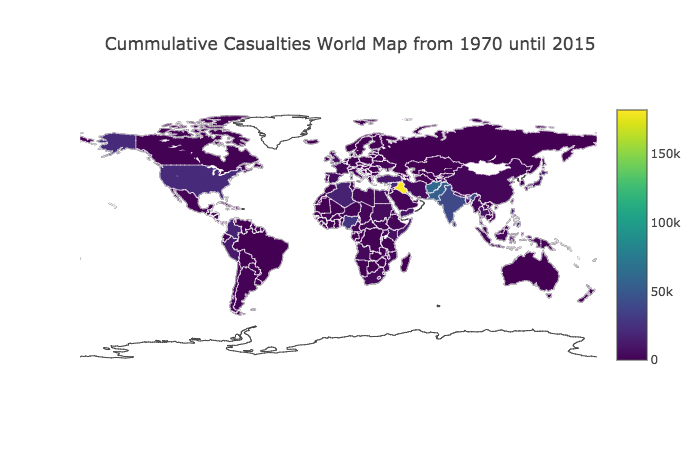

#### A. Which countries are the most targeted?
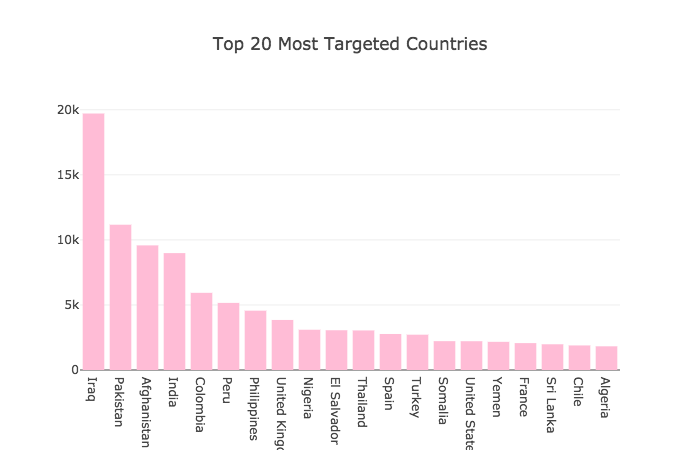
##### We can see that Iraq has the highest number of casualities at appromixtely 20k. 
#### B. Where are there the most casualties?
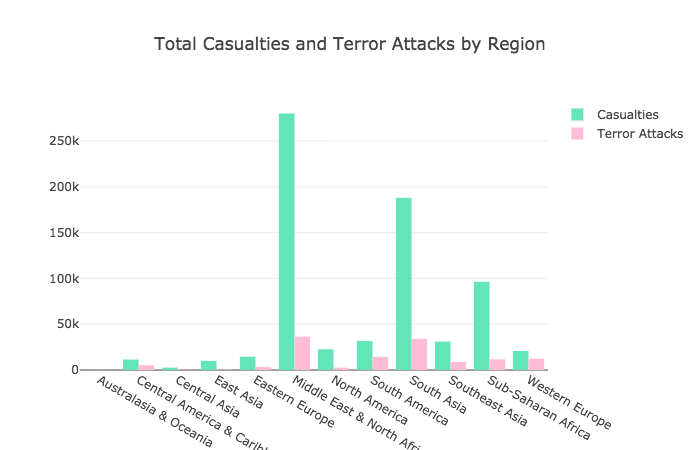
#####  We can see that Middle East has the highest number of casualities at over 250k 
#C. How have casualties evolved (increased or decreased) throughout the years?
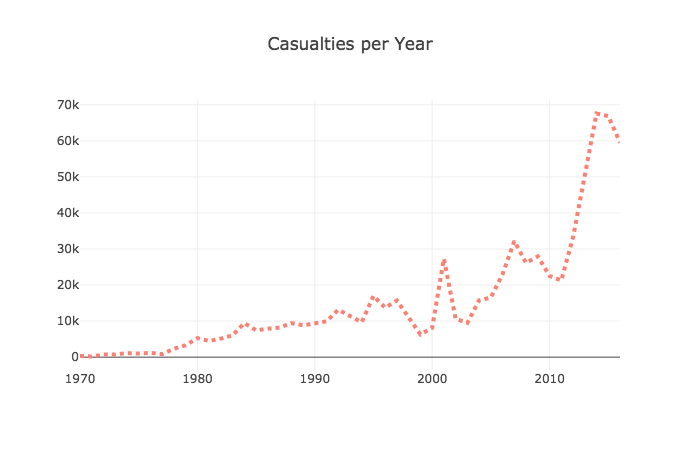
##### We can see that casualties have dramtically increased over the years, especially post 9/11. 
#D. What are the casualties by weapon type?
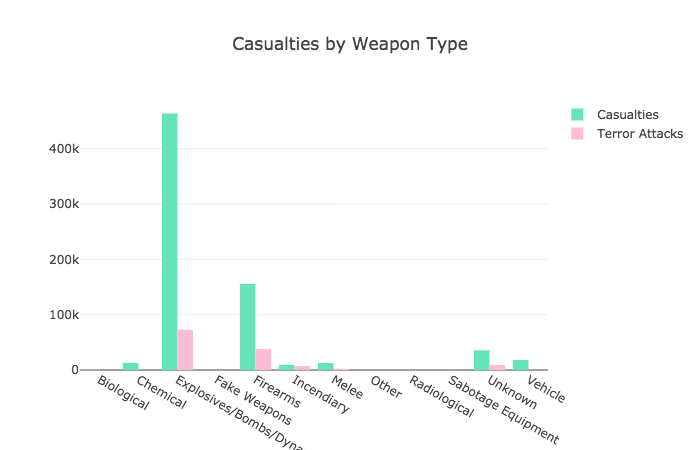
##### We can see that the most common weapon used is explosives/bombs/dynamite. 

#### Analyze the data using scikit learn's Random Forest Library:
##### A. Can we class if attack is success or fail and find the most import feature in the successfull or fail? 
#Using Random Forest classification from sklearn, we were able to class if an attack is success or fail with an accuracy of 72%. 

#The most important features to classify success or failure are: 
#1.longitude (13.36%)
#2.latitude(13.28%)
#3.iyear(10.55%)
#4.attacktype1(10.28%)
#5.iday(9.92%)

#The precision score for for fail is .70 and .75 for success. The precision score is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative with 1 being the "best" score. With an average score of .73, that is a sign of a good classification model. 

#The recall score for fail .78 is and 67 for success. The recall score is the ratio (tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples with 1 being the "best" score.With an average score of .72, that is a sign of a good classification model. 

##### AUC Results 
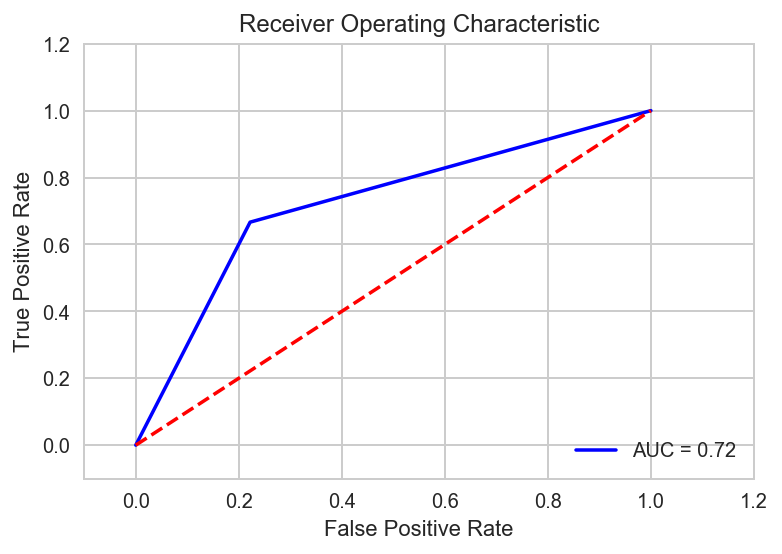

##### The AUC curve for this model is .72. The model we ran would be considered to be "good" at classifying if an attack is a success or failure. 

#### Notes on AUC Curves
#The area under (a ROC) curve is a summary measure of the accuracy of a classfication model. 

#The confidence interval for AUC indicates the uncertainty of the estimate and uses the Wald Z large sample normal approximation. A test with no better accuracy than chance has an AUC of 0.5, a test with perfect accuracy has an AUC of 1.

#The interpretation of the AUC is:
#The average value of sensitivity for all possible values of specificity.
#The average value of specificity for all possible values of sensitivity.

##### B. Can we predict if an attack will be successful?
#Using Random Forest, we can predict that a terrorist attack will have a 70% chance of failure based on weapon type, target type and location. Two new attacks have 70% chance of failure in Bejing given the GTD dataset.
#For example, 
#1. An attack on 3/19/17 against Military(Military Personnel) with Firearms has a 70% chance of failure. 
#2. An attack on 10/28/17 against Private Citizens & Property (Marketplace/Plaza/Square) has a 70% chance of failure. 

In [59]:
## Importing Packages

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
import os, sys, operator, warnings

# Scikit-learn Classification Models
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, datasets
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

py.offline.init_notebook_mode(connected=True)

# Other imports
import itertools
# import pprint
import patsy

# Setting some styles and options
sns.set_style('whitegrid') 
pd.options.display.max_columns = 40 

%config InlineBackend.figure_format = 'retina'
 
%matplotlib inline


In [60]:
#import data
GTD = pd.read_csv('/Users/dramnath/Desktop/DR_Git/DS_FinalProject/globalterrorismdb_0617dist.csv', low_memory = False, encoding='ISO-8859-1')


## Data Dictionary

### Spatio-Temporal Variables:

#'iyear'            : year of the incident
#'imonth'           : month of the incident
#'iday'             : day of the incident

#'latitude'         : latitude of the incident
#'longitude'        : longitude of the incident

### Continous variables: 

#'nkill'            : number of dead
#'nwound'           : number of wounded

### Binary Variables:

#'crit1'            : was the attack aimed at attaining a political, economic, religious, or social goal?
#'crit2'            : was there intent to coerce or intimidate a larger audience than the victims?
#'crit3'            : was the incident outside legitimate warfare activities (i.e. target non-combattants)?
#'doubtter'         : was there doubt as to whether or not the incident is a terrorist attack
#'extended'         : has the incident lasted for more than 24 hours?
#'multiple'         : is the incident connected to other attacks?
#'success'          : did the terrorist attack achieve its goal?
#'suicide'          : did the incident involve a suicide attack?
#'guncertain1'      : was the terrorist group confirmed?
#'claimed'          : was the incident claimed by a particular group?
#'property'         : was property damaged during the attack?
#'ishostkid'        : were victims taken hostages or kidnapped?

### Categorical Variables:

#'country_txt'      : country in which the incident occured
#'region_txt'       : region in which the incident occured
#'alternative_txt'  : type of attack if it was not terrorist for certain
#'attacktype1_txt'  : general method of attack used (i.e. assassination, hijacking, bombing/explosion, etc.)
#'targtype1_txt'    : general type of target/victim (i.e. business, government, police, military, etc.)
#'natlty1_txt'      : nationality of the target/victim
#'weaptype1_txt'    : general type of weapon used in the incident (i.e. biological, chemical, firearms, etc.)

### Descriptive Variables: 

#'target1'          : specific person, building, installation, etc. that was targeted
#'gname'            : terrorist group responsible for the attack
#'summary'          : summary of the incident, when avaialble



In [61]:
GTD = GTD.loc[:, data_columns]

#restrict the dataset to only attacks that were of terrorist nature.
GTD = GTD[(GTD.crit1 == 1) & (GTD.crit2 == 1) & (GTD.crit3 == 1) & (GTD.doubtterr == 0)]

In [62]:
#shape of data 
print ('The dataset documents', GTD.shape[0], 'terror attacks with', GTD.shape[1], 'different features')

The dataset documents 129922 terror attacks with 30 different features


In [63]:
GTD.describe()

,iyear,imonth,iday,latitude,longitude,extended,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1,claimed,property,ishostkid,nkill,nwound
count,129922.000000,129922.000000,129922.000000,127055.000000,127055.000000,129922.000000,129922.000000,129922.0,129922.0,129922.0,129922.0,129922.000000,129922.000000,129922.000000,129670.000000,87854.000000,129922.000000,129761.000000,123568.000000,119641.000000
mean,2003.100137,6.466949,15.480935,23.766259,29.252534,0.048044,0.063515,1.0,1.0,1.0,0.0,0.151229,0.888956,0.036253,0.097363,0.026077,-0.606079,0.061266,2.248406,3.603806
std,12.815516,3.399991,8.811146,18.555915,56.758678,0.213861,0.286952,0.0,0.0,0.0,0.0,0.358274,0.314187,0.186919,0.296452,1.125619,3.209477,0.457612,10.672266,39.210882
min,1970.000000,0.000000,0.000000,-53.154613,-157.858333,0.000000,-9.000000,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.727761,6.405593,0.000000,0.000000,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.640278,43.795649,0.000000,0.000000,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.604447,69.101566,0.000000,0.000000,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
max,2016.000000,12.000000,31.000000,74.633553,179.366667,1.000000,1.000000,1.0,1.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1383.000000,7366.000000


In [64]:
##cleaning the Data

#Change weapon type categories
GTD.weaptype1_txt.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)

#replace the unknown values in columns vicinity, claimed, property, and ishostkid with zeros
GTD.iloc[:,[6, 15, 16, 17]] = GTD.iloc[:,[6, 15, 16, 17]].replace(-9,0)
GTD.claimed.replace(2,1, inplace = True) # (3)

#change text variables to lowercase 
GTD.target1 = GTD.target1.str.lower()
GTD.gname = GTD.gname.str.lower()
GTD.summary = GTD.summary.str.lower()    
GTD.target1 = GTD.target1.fillna('unknown').replace('unk','unknown')

#missing values for the number of dead and wounded using the median
GTD.nkill = np.round(GTD.nkill.fillna(GTD.nkill.median())).astype(int) 
GTD.nwound = np.round(GTD.nwound.fillna(GTD.nwound.median())).astype(int)

#create two new fields: total number of casualties and its binary interpretation
GTD['casualties'] = GTD.nkill + GTD.nwound
GTD['nclass'] = GTD.casualties.apply(lambda x: 0 if x == 0 else 1) 

#missing data
GTD.fillna(0)


,iyear,imonth,iday,latitude,longitude,extended,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1,claimed,property,ishostkid,nkill,nwound,country_txt,region_txt,alternative_txt,attacktype1_txt,targtype1_txt,natlty1_txt,weaptype1_txt,target1,gname,summary,casualties,nclass
0,1970,7,2,18.456792,-69.951164,0,0,1,1,1,0,0,1,0,0.0,0.0,0,0.0,1,0,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Dominican Republic,Unknown,julio guzman,mano-d,0,1,1
1,1970,0,0,19.432608,-99.133207,0,0,1,1,1,0,0,1,0,0.0,0.0,0,1.0,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,Unknown,"nadine chaval, daughter",23rd of september communist league,0,0,0
2,1970,1,0,15.478598,120.599741,0,0,1,1,1,0,0,1,0,0.0,0.0,0,0.0,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,United States,Unknown,employee,unknown,0,1,1
3,1970,1,0,37.983773,23.728157,0,0,1,1,1,0,0,1,0,0.0,0.0,1,0.0,0,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),United States,Explosives/Bombs/Dynamite,u.s. embassy,unknown,0,0,0
5,1970,1,1,37.005105,-89.176269,0,0,1,1,1,0,0,1,0,0.0,0.0,1,0.0,0,0,United States,North America,0,Armed Assault,Police,United States,Firearms,cairo police headquarters,black nationalists,1/1/1970: unknown african american assailants ...,0,0
6,1970,1,2,-34.891151,-56.187214,0,0,1,1,1,0,0,0,0,0.0,0.0,0,0.0,0,0,Uruguay,South America,0,Assassination,Police,Uruguay,Firearms,juan maria de lucah/chief of directorate of in...,tupamaros (uruguay),0,0,0
8,1970,1,2,43.076592,-89.412488,0,0,1,1,1,0,0,1,0,0.0,1.0,1,0.0,0,0,United States,North America,0,Facility/Infrastructure Attack,Military,United States,Incendiary,"r.o.t.c. offices at university of wisconsin, m...",new year's gang,"1/2/1970: karl armstrong, a member of the new ...",0,0
9,1970,1,3,43.072950,-89.386694,0,0,1,1,1,0,0,1,0,0.0,0.0,1,0.0,0,0,United States,North America,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,selective service headquarters in madison wisc...,new year's gang,"1/3/1970: karl armstrong, a member of the new ...",0,0
13,1970,1,9,42.331685,-83.047924,0,0,1,1,1,0,0,1,0,0.0,0.0,1,0.0,0,0,United States,North America,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,packard properties building of detroit michigan,left-wing militants,1/9/1970: unknown perpetrators set off a fireb...,0,0
15,1970,1,10,52.516667,13.400000,0,0,1,1,1,0,0,1,0,0.0,0.0,0,0.0,0,0,East Germany (GDR),Eastern Europe,0,Bombing/Explosion,Government (General),Germany,Explosives/Bombs/Dynamite,jurists ball (palais au frankturm),commune 1,0,0,0


In [81]:
#Map of Casualties from 1970 to 2015
trace = dict(
    type = 'choropleth',
    locationmode = 'country names',
    locations = cpc['country_txt'],

    z = cpc['casualties'],
    name = 'Casualties',
    text = cpc['country_txt'].astype(str) + '<br>' + cpc['casualties'].astype(str),
    hoverinfo = 'text+name',
    autocolorscale = False,
    colorscale = 'Viridis',
#     reversescale = True,
    marker = dict( line = dict ( color = 'rgb(255,255,255)', width = 0.5))
        
    )
        

layout = dict(
    title = 'Cummulative Casualties World Map from 1970 until 2015 ',
    geo = dict( showframe = False, showcoastlines = True,
               projection = dict(type = 'Mercator'), showlakes = True,
               lakecolor = 'rgb(255, 255, 255)'       
              )
    )
    

py.iplot(dict( data=[trace], layout=layout ))

In [58]:
#Casualties by Year

cpy = GTD.groupby('iyear', as_index=False)['casualties'].sum()

trace = go.Scatter(x = cpy.iyear, y = cpy.casualties,
                   name = 'Casualties', line = dict(color = 'salmon', width = 4, dash ='dot'),
                   hoverinfo = 'x+y+name')

layout = go.Layout(title = 'Casualties per Year')

py.iplot(dict(data = [trace], layout = layout))  

In [54]:
#Casualties by Region
cpr = GTD.groupby('region_txt', as_index= False)['casualties'].sum()
apr = GTD.groupby('region_txt')['region_txt'].count()

trace_1 = go.Bar(x = cpr.region_txt, y = cpr.casualties,
                 marker = dict(color = 'rgb(100, 229, 184)'),
                 name = 'Casualties')

trace_2 = go.Bar(x = apr.index, y = apr,
                 marker = dict(color = 'rgb(255, 188, 214)'),
                 name = 'Terror Attacks')

layout = go.Layout(title = "Total Casualties and Terror Attacks by Region", barmode='group' )


py.iplot(dict(data = [trace_1,trace_2], layout = layout))

In [55]:
##Top 20 countries by attack/fatalities
apc = GTD.groupby('country_txt')['country_txt'].count().sort_values(ascending= False)
cpc = GTD.groupby('country_txt', as_index= False)['casualties'].sum().sort_values(by = 'casualties', ascending= False)
cc = pd.merge(pd.DataFrame(apc), cpc, on = 'country_txt')


trace = go.Bar(x = apc.index[:20],y = apc,
                 marker = dict(color = 'rgb(255, 188, 214)'),
                 name = 'Terror Attacks')

layout = go.Layout(title = 'Top 20 Most Targeted Countries', barmode='relative' )

py.iplot(dict(data = [trace], layout = layout)) 

In [10]:
##Casualties by Weapon Type
cpr = GTD.groupby('weaptype1_txt', as_index= False)['casualties'].sum()
apr = GTD.groupby('weaptype1_txt')['weaptype1_txt'].count()

trace_1 = go.Bar(x = cpr.weaptype1_txt, y = cpr.casualties,
                 marker = dict(color = 'rgb(100, 229, 184)'),
                 name = 'Casualties')

trace_2 = go.Bar(x = apr.index, y = apr,
                 marker = dict(color = 'rgb(255, 188, 214)'),
                 name = 'Terror Attacks')

layout = go.Layout(title = "Casualties by Weapon Type", barmode='group' )


py.iplot(dict(data = [trace_1,trace_2], layout = layout))

## Prediction
#Can we class if attack is success or fail and find the most import feature in the successfull or fail? 
#Can we predict  if an attach will be successful?

In [65]:
##import clean dataset
GTD_Predict = pd.read_csv('/Users/dramnath/Desktop/DR_Git/DS_FinalProject/globalterrorismdb_0617dist.csv', low_memory = False, encoding='ISO-8859-1')
GTD_Predict.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,...,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,...,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,NaN,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [66]:
#extract usefull features
GTD_Predict1 = GTD_Predict[['iyear','imonth','iday','country','region','latitude','longitude','specificity'
        ,'vicinity','crit1','crit2','crit3','doubtterr','multiple','success','suicide'
        ,'attacktype1','targtype1','targsubtype1','guncertain1','weaptype1']]

In [67]:
##Randorm Forest Classifcation - Class if an attack is success or fail 
#Drop NA and transform data for Random Forest 
dfs=GTD_Predict1[GTD_Predict1['success']==1].dropna()
dff=GTD_Predict1[GTD_Predict1['success']==0].dropna()
dfs=dfs.sample(len(dff))


yf=dff['success']
xf=dff.drop(['success'],axis=1)


ys=dfs['success']
xs=dfs.drop(['success'],axis=1)

In [68]:
#train data set
train1,test1=train_test_split(dfs,test_size=0.3)
train2,test2=train_test_split(dff,test_size=0.3)

train=train1.append(train2)
test=test1.append(test2)

In [69]:
Y=train['success'].values
X = train.drop(['success'],axis=1).values

y=test['success'].values
x = test.drop(['success'],axis=1).values

#X=MinMaxScaler().fit_transform(X)
#x=MinMaxScaler().fit_transform(x)

#pca=PCA(n_components=5)
#Xd=pca.fit_transform(X)
#xd=pca.fit_transform(x)

In [70]:
#transformer=SelectKBest(score_func=chi2,k=5)
#Xt=transformer.fit_transform(abs(X),Y)
#xt=transformer.fit_transform(abs(x),y)

In [71]:
#Fit the Model
reg_model = RandomForestClassifier()
reg_model = reg_model.fit(X,Y)

pred = reg_model.predict(x)

print(len(pred[pred==y])/float(len(y)))

0.7223138548539114


In [72]:
#List Important Features
X = train.drop(['success'],axis=1)

w11=pd.Series(np.sort(reg_model.feature_importances_),X.columns[np.argsort(reg_model.feature_importances_)])
w11.sort_values(inplace=True,ascending=False)
print (w11)

longitude       0.137264
latitude        0.130512
iyear           0.106562
attacktype1     0.102839
iday            0.102817
targsubtype1    0.095414
imonth          0.077027
country         0.061991
weaptype1       0.040079
targtype1       0.039540
region          0.026272
specificity     0.018309
doubtterr       0.015728
multiple        0.011538
guncertain1     0.009171
vicinity        0.008755
crit3           0.006591
suicide         0.006473
crit1           0.001912
crit2           0.001204
dtype: float64


#### Analysis - Top 5 Important Features
#1. longitude - 13.36%
#2. latitude - 13.28%
#3. iyear - 10.55%
#4. attacktype1 - 10.28%
#5. iday - 9.92%

In [73]:
##Print Summary
print(metrics.classification_report(y, pred))
print(metrics.confusion_matrix(y, pred))

             precision    recall  f1-score   support

          0       0.70      0.78      0.74      4244
          1       0.75      0.67      0.71      4244

avg / total       0.73      0.72      0.72      8488

[[3302  942]
 [1415 2829]]


AUC = 0.7223


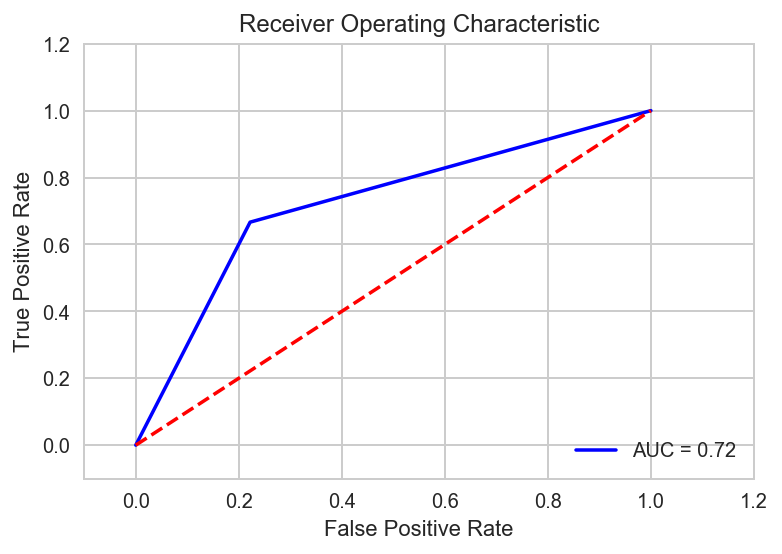

In [74]:
##AUC Graph
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC = %0.4f'% roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUC Results 
#The AUC curve for thsi model is .72. The AUC would be considered to be "good" at classifying if an attack is a success or failure. 

##Prediction - Predict if an attach will be successful

In [78]:
chi=GTD_Predict[GTD_Predict['country_txt']=='China']
bj=chi[chi['provstate']=='Beijing']
bj1=bj[['iyear','imonth','iday','country','region','latitude','longitude','specificity'
        ,'vicinity','crit1','crit2','crit3','doubtterr','multiple','success','suicide'
        ,'attacktype1','targtype1','targsubtype1','guncertain1','weaptype1']]

bj1['iyear']=2017
bj1=bj1.dropna()
bjx = bj1.drop(['success'],axis=1).values

/Users/dramnath/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [79]:
##Fit the Model
bjy=reg_model.predict_proba(bjx)
pd.DataFrame(bjy,columns=['fail_prob','success_prob'])

,fail_prob,success_prob
0,0.7,0.3
1,0.5,0.5
2,0.4,0.6
3,0.4,0.6
4,0.6,0.4


In [80]:
#look at two predictions for Bejing
bj1[-2:]

,iyear,imonth,iday,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,guncertain1,weaptype1
91013,2017,3,19,44,4,29.563010,106.551557,1.0,0,1,1,1,0,0,1,0,2,4,34.0,1.0,5
122548,2017,10,28,44,4,39.903948,116.391805,1.0,0,1,1,1,0,0,1,0,2,14,74.0,0.0,8
